<a href="https://colab.research.google.com/github/anamika-ds/flexural-testing-app/blob/main/Flexural_testing_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📍 **Project Title:**
**Predicting Extension, Flexural Stress and Strain Using Machine Learning**

## 📜 **Problem Statement**

Flexural stress is a critical mechanical property in materials science, particularly for evaluating the strength of materials under bending loads. Accurately predicting Extension, flexural stress and strain based on input features such as load, can help in designing better materials and optimizing manufacturing processes.

🔹 **Objective:**


*   Build a machine learning model to predict Extension, flexural stress and strain based on an input feature.

*   Evaluate the model's performance using metrics like R² score and RMSE.

*  Analyze feature importance to understand which factors most influence flexural stress.

🔹 **Dataset Overview:**

The datset contains **2081 entries**, 0 to 2080 with the following key columns:

*   Time (s): Time in seconds.
*   Extension (mm): Change in sample length.
*   Load (kN): Applied force in kilonewtons.
*   Flexure stress (Mpa): Stress experienced by the material.
*   Flexure strain (%): Percentage strain.

🔹 **Methodology:**

We will use the following steps to solve the problem:

1.   Data preprocessing
2.   Model selection
3.   Model training
4.   Model evaluation
5.   Feature importance
6.   Visualization plots
7.   Deployment

## **1. Data preprocessing:**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor
import joblib



In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving specimen.csv to specimen.csv


In [3]:
# Read the csv file
df = pd.read_csv('specimen.csv')
print(df.head())
print(df.info())

   Time(s)   Extension(mm)  Load(kN)  Flexural stress(MPa)  Flexural strain(%)
0       NaN            NaN       NaN                   NaN                 NaN
1       0.0            0.0       0.0                  0.00                 0.0
2       0.1            0.0       0.0                 -0.02                 0.0
3       0.2            0.0       0.0                 -0.01                 0.0
4       0.3            0.0       0.0                  0.00                 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time(s)               2080 non-null   float64
 1   Extension(mm)         2080 non-null   float64
 2   Load(kN)              2080 non-null   float64
 3   Flexural stress(MPa)  2080 non-null   float64
 4   Flexural strain(%)    2080 non-null   float64
dtypes: float64(5)
memory usage: 81.4 KB
None


In [4]:
# Check for missing values
print(df.isnull().sum())

Time(s)                 1
Extension(mm)           1
Load(kN)                1
Flexural stress(MPa)    1
Flexural strain(%)      1
dtype: int64


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)
print(df.isnull().sum())

Time(s)                 0
Extension(mm)           0
Load(kN)                0
Flexural stress(MPa)    0
Flexural strain(%)      0
dtype: int64


In [6]:
# Check for duplicates
print(df.duplicated().sum())

0


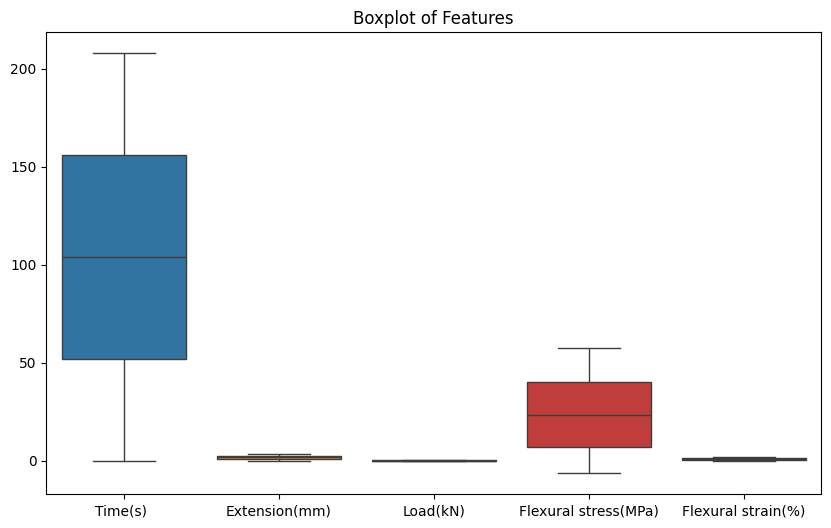

In [7]:
# Data cleaning: check for outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()

All load values are **0.0** which is a red flag. This could indicate any missing data, measurement error or **constant load**. If the experiment was conducted under no load, this might be valid, but it’s worth investigating.

Both features (Extension(mm) and Flexural strain(%)) have **narrow boxes** with medians close to 0, indicating **low variability** and a strong skew toward 0.

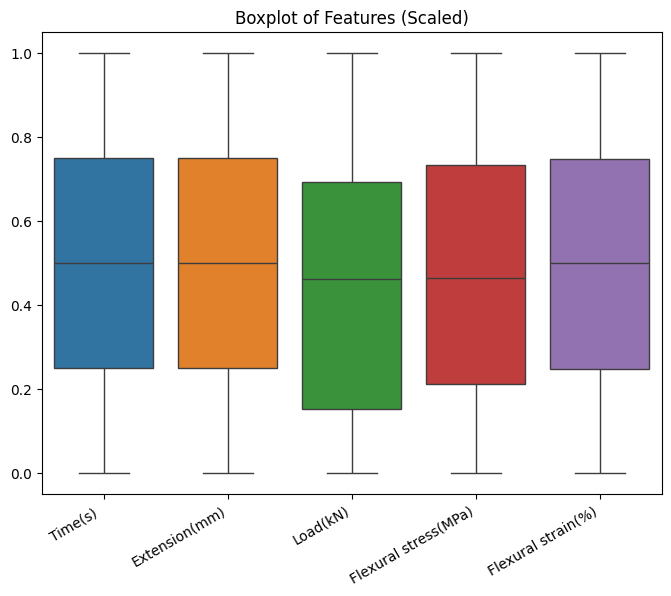

In [8]:
# Further check for outliers
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=30, ha="right")  # Rotating x-axis labels for better readability
plt.title("Boxplot of Features (Scaled)")
plt.show()

Although the **boxplot** did not show outliers, we can double-check using statistical methods like the **Interquartile Range (IQR)**.

In [9]:
# Calculate IQR for Load(kN)
Q1 = df['Load(kN)'].quantile(0.25)
Q3 = df['Load(kN)'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Load(kN)'] < lower_bound) | (df['Load(kN)'] > upper_bound)]
print("Outliers in Load(kN):")
print(outliers)

Outliers in Load(kN):
Empty DataFrame
Columns: [Time(s) , Extension(mm), Load(kN), Flexural stress(MPa), Flexural strain(%)]
Index: []


This dataset **does not** contain any **outliers**, which is a good sign. It means the data is **consistent** and does not have extreme values that could skew the analysis.

In [10]:
# Check for constant Values
# Check if all values in Load(kN) are 0.0
if (df['Load(kN)'] == 0.0).all():
    print("All Load(kN) values are 0.0. This might indicate missing data or a constant load condition.")
else:
    print("Load(kN) values are not all 0.0.")

# Check if all values in Extension(mm) are 0.0
if (df['Extension(mm)'] == 0.0).all():
    print("All Extension(mm) values are 0.0. This might indicate missing data or no extension.")
else:
    print("Extension(mm) values are not all 0.0.")


# Check if all values in Flexural strain(%) are 0.0
if (df['Flexural strain(%)'] == 0.0).all():
    print("All Flexural strain(%) values are 0.0. This might indicate missing data or no strain.")
else:
    print("Flexural strain(%) values are not all 0.0.")

Load(kN) values are not all 0.0.
Extension(mm) values are not all 0.0.
Flexural strain(%) values are not all 0.0.


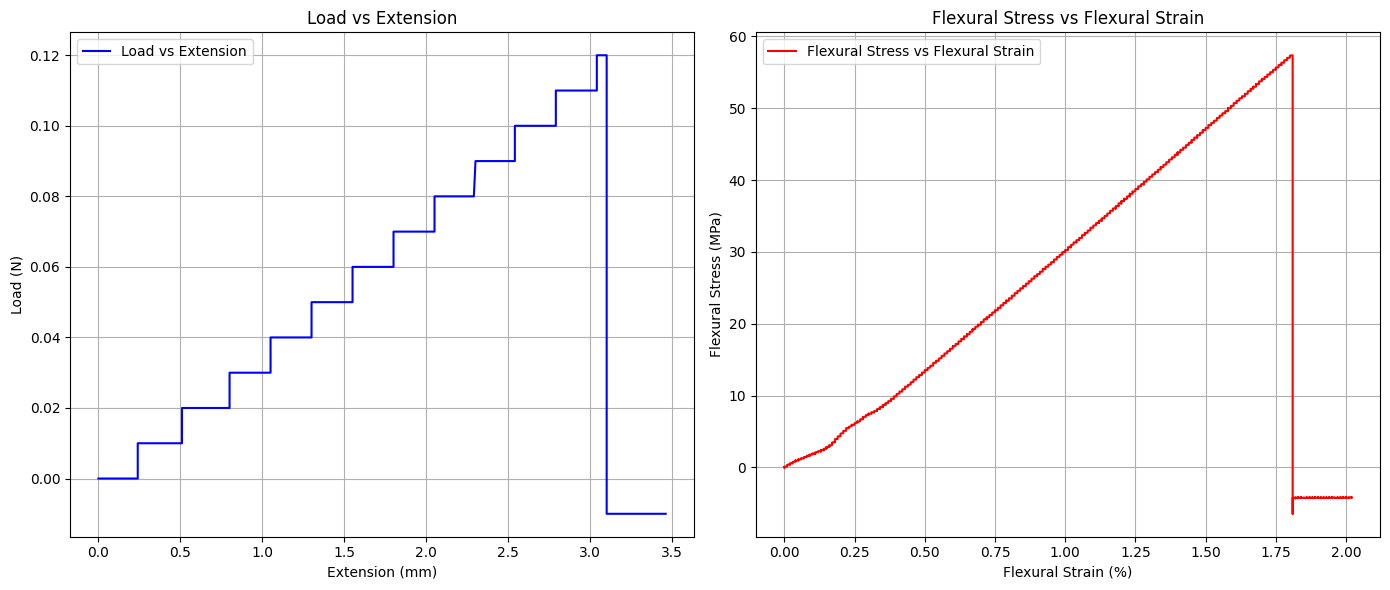

In [11]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Load vs Extension
ax1.plot(df['Extension(mm)'], df['Load(kN)'], color='blue', label='Load vs Extension')
ax1.set_xlabel('Extension (mm)')
ax1.set_ylabel('Load (N)')
ax1.set_title('Load vs Extension')
ax1.grid(True)
ax1.legend()

# Plot Flexural Stress vs Flexural Strain
ax2.plot(df['Flexural strain(%)'], df['Flexural stress(MPa)'], color='red', label='Flexural Stress vs Flexural Strain')
ax2.set_xlabel('Flexural Strain (%)')
ax2.set_ylabel('Flexural Stress (MPa)')
ax2.set_title('Flexural Stress vs Flexural Strain')
ax2.grid(True)
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [12]:
# Summary statistics
# Summary statistics for Load(kN)
print("Summary statistics for Load(kN):")
print(df['Load(kN)'].describe())

Summary statistics for Load(kN):
count    2080.000000
mean        0.048567
std         0.039042
min        -0.010000
25%         0.010000
50%         0.050000
75%         0.080000
max         0.120000
Name: Load(kN), dtype: float64


The output indicates that there are **no outliers** in the **Load(kN)** feature.

In [13]:
# Summary statistics for Extension(mm)
print("Summary statistics for Extension(mm):")
print(df['Extension(mm)'].describe())

Summary statistics for Extension(mm):
count    2080.000000
mean        1.731635
std         1.000977
min         0.000000
25%         0.867500
50%         1.730000
75%         2.600000
max         3.460000
Name: Extension(mm), dtype: float64


In [14]:
# Summary statistics for Flexural strain(%)
print("Summary statistics for Flexural strain(%):")
print(df['Flexural strain(%)'].describe())

Summary statistics for Flexural strain(%):
count    2080.000000
mean        1.009788
std         0.583927
min         0.000000
25%         0.500000
50%         1.010000
75%         1.512500
max         2.020000
Name: Flexural strain(%), dtype: float64


In [15]:
# Check for missing values in Load(kN), Extension(mm), and Flexural strain(%)
print("Missing values in Load(kN):", df['Load(kN)'].isnull().sum())
print("Missing values in Extension(mm):", df['Extension(mm)'].isnull().sum())
print("Missing values in Flexural strain(%):", df['Flexural strain(%)'].isnull().sum())

Missing values in Load(kN): 0
Missing values in Extension(mm): 0
Missing values in Flexural strain(%): 0


In [16]:
# Check for unique values
# Check unique values in Load(kN)
print("Unique Load(kN) values:", df['Load(kN)'].unique())

# Check unique values in Extension(mm)
print("Unique Extension(mm) values:", df['Extension(mm)'].unique())

# Check unique values in Flexural strain(%)
print("Unique Flexural strain(%) values:", df['Flexural strain(%)'].unique())

Unique Load(kN) values: [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12 -0.01]
Unique Extension(mm) values: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.

In [17]:
# Check rows with negative Load(kN) values
negative_loads = df[df['Load(kN)'] < 0]
print("Rows with negative Load(kN) values:")
print(negative_loads)

Rows with negative Load(kN) values:
      Time(s)   Extension(mm)  Load(kN)  Flexural stress(MPa)  \
1861    186.00           3.10     -0.01                 -6.46   
1862    186.10           3.10     -0.01                 -4.31   
1863    186.20           3.10     -0.01                 -4.27   
1864    186.30           3.10     -0.01                 -4.20   
1865    186.40           3.11     -0.01                 -4.22   
...        ...            ...       ...                   ...   
2076    207.50           3.46     -0.01                 -4.20   
2077    207.60           3.46     -0.01                 -4.18   
2078    207.70           3.46     -0.01                 -4.20   
2079    207.80           3.46     -0.01                 -4.23   
2080    207.86           3.46     -0.01                 -4.21   

      Flexural strain(%)  
1861                1.81  
1862                1.81  
1863                1.81  
1864                1.81  
1865                1.81  
...                  

In [18]:
# Feature engineering
# Select features and target variable
X = df[['Load(kN)']]  # Input feature
y = df[['Extension(mm)', 'Flexural stress(MPa)', 'Flexural strain(%)']]

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **2. Model selection:**

In [21]:
# Model selection
# Linear Regression
# Wrap LinearRegression in MultiOutputRegressor
multi_output_lr = MultiOutputRegressor(LinearRegression())

# Train the model
multi_output_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = multi_output_lr.predict(X_test)

# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr, multioutput='raw_values')  # R² for each target

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2 Scores:")
print(f"Extension(mm): {r2_lr[0]:.4f}")
print(f"Flexural stress(MPa): {r2_lr[1]:.4f}")
print(f"Flexural strain(%): {r2_lr[2]:.4f}")


Linear Regression RMSE: 0.9587699623396047
Linear Regression R2 Scores:
Extension(mm): 0.2207
Flexural stress(MPa): 0.9952
Flexural strain(%): 0.2208


The results indicate that the **Linear Regression** model **performs well** for predicting Flexural stress(MPa) (**R² = 0.9952**) but **poorly** for Extension(mm) and Flexural strain(%) (**R² ≈ 0.22**).

In [22]:
# Ridge Regression
# Wrap Ridge in MultiOutputRegressor
multi_output_ridge = MultiOutputRegressor(Ridge(alpha=1.0))  # alpha is the regularization strength

# Train the model
multi_output_ridge.fit(X_train, y_train)

# Make predictions
y_pred_ridge = multi_output_ridge.predict(X_test)

# Evaluate the model
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge, multioutput='raw_values')  # R² for each target

print("Ridge Regression RMSE:", rmse_ridge)
print("Ridge Regression R² Scores:")
print(f"Extension(mm): {r2_ridge[0]:.4f}")
print(f"Flexural stress(MPa): {r2_ridge[1]:.4f}")
print(f"Flexural strain(%): {r2_ridge[2]:.4f}")

Ridge Regression RMSE: 0.9586985827205066
Ridge Regression R² Scores:
Extension(mm): 0.2207
Flexural stress(MPa): 0.9952
Flexural strain(%): 0.2208


The results indicate that **Ridge Regression** is **not** significantly improving the performance for Extension(mm) and Flexural strain(%)

In [23]:
# Decision Tree
# Wrap DecisionTreeRegressor in MultiOutputRegressor
multi_output_dt = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

# Train the model
multi_output_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = multi_output_dt.predict(X_test)

# Evaluate the model
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt, multioutput='raw_values')  # R² for each target

print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R² Scores:")
print(f"Extension(mm): {r2_dt[0]:.4f}")
print(f"Flexural stress(MPa): {r2_dt[1]:.4f}")
print(f"Flexural strain(%): {r2_dt[2]:.4f}")

Decision Tree RMSE: 0.7310992102425838
Decision Tree R² Scores:
Extension(mm): 0.9945
Flexural stress(MPa): 0.9955
Flexural strain(%): 0.9946


Relatively **Low RMSE**, suggests that the model's predictions are **close** to the actual values. These **R² scores** indicate that the Decision Tree model explains over **99%** of the variance in all three target variables (Extension(mm), Flexural stress(MPa), and Flexural strain(%)).

In [28]:
# Random Forest Regressor
# Wrap RandomForestRegressor in MultiOutputRegressor
multi_output_rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))

# Train the model
multi_output_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = multi_output_rf.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf, multioutput='raw_values')  # R² for each target

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R² Scores:")
print(f"Extension(mm): {r2_rf[0]:.4f}")
print(f"Flexural stress(MPa): {r2_rf[1]:.4f}")
print(f"Flexural strain(%): {r2_rf[2]:.4f}")

Random Forest RMSE: 0.7310941329428957
Random Forest R² Scores:
Extension(mm): 0.9945
Flexural stress(MPa): 0.9955
Flexural strain(%): 0.9945


The Random Forest  and Decision Tree model perform almost **identically**. However, Random Forest is preferred to avoid overfitting and are more reliable and robust.

In [29]:
# Model improvement (Hyperparameter Tuning)
# Tuning Random Forest

# Define the base model
base_model = RandomForestRegressor(random_state=42)

# Wrap the base model in MultiOutputRegressor
model = MultiOutputRegressor(base_model)

# Define the parameter grid
param_grid = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10]
}
# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'estimator__max_depth': None, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}


## **3. Model training:**

In [32]:
# Train the final model with the best hyperparameters
best_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(n_estimators=200,
                                                     random_state=42))

## **4.Model evaluation:**

In [30]:
# Evaluate the model
y_pred = best_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score for Extension(mm):", r2_score(y_test['Extension(mm)'], y_pred[:, 0]))
print("R² Score for Flexural stress(MPa):", r2_score(y_test['Flexural stress(MPa)'], y_pred[:, 1]))
print("R² Score for Flexural strain(%):", r2_score(y_test['Flexural strain(%)'], y_pred[:, 2]))

Mean Squared Error: 0.534352148142629
R² Score for Extension(mm): 0.9945348959932541
R² Score for Flexural stress(MPa): 0.9954582772237703
R² Score for Flexural strain(%): 0.9945530842932649


## **5. Feature importance:**

Considering 3 input features and 1 target **ONLY for feature importance analysis**

In [33]:
df.dropna(inplace=True)
X_dum = df.drop(columns=['Flexural stress(MPa)']) # input features
y_dum = df['Flexural stress(MPa)'] # target

# Split the data into training and testing sets
X_dum_train, X_dum_test, y_dum_train, y_dum_test = train_test_split(X_dum, y_dum, test_size=0.2, random_state=42)

In [35]:
# Random Forest Regressor (dummy)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dum_train, y_dum_train)
y_prd_rf = rf.predict(X_dum_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_dum_test, y_prd_rf)))
print("Random Forest R2 Score:", r2_score(y_dum_test, y_prd_rf))

# Tuning Random Forest (dummy)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_dum_train, y_dum_train)
best_rf = grid_search.best_estimator_
y_prd_best_rf = best_rf.predict(X_dum_test)
print("Best Random Forest RMSE:", np.sqrt(mean_squared_error(y_dum_test, y_prd_best_rf)))
print("Best Random Forest R2 Score:", r2_score(y_dum_test, y_prd_best_rf))


Random Forest RMSE: 0.04174027955704559
Random Forest R2 Score: 0.9999950410226328
Best Random Forest RMSE: 0.04143451487542197
Best Random Forest R2 Score: 0.9999951134096156


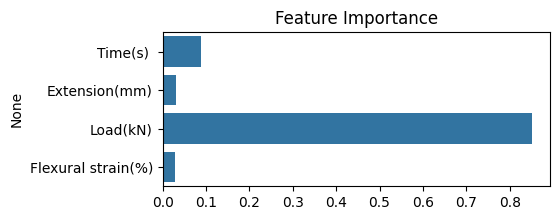

In [36]:
# Feature Importance for Random Forest
feature_importances = best_rf.feature_importances_
features = df.drop(columns=['Flexural stress(MPa)']).columns
plt.figure(figsize=(5, 2))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance")
plt.show()

**Load (kN)** is the **most important** feature. The model heavily relies on it for predictions.

## **6. Visualization plots:**

### **6.1 Distribution of target variables**

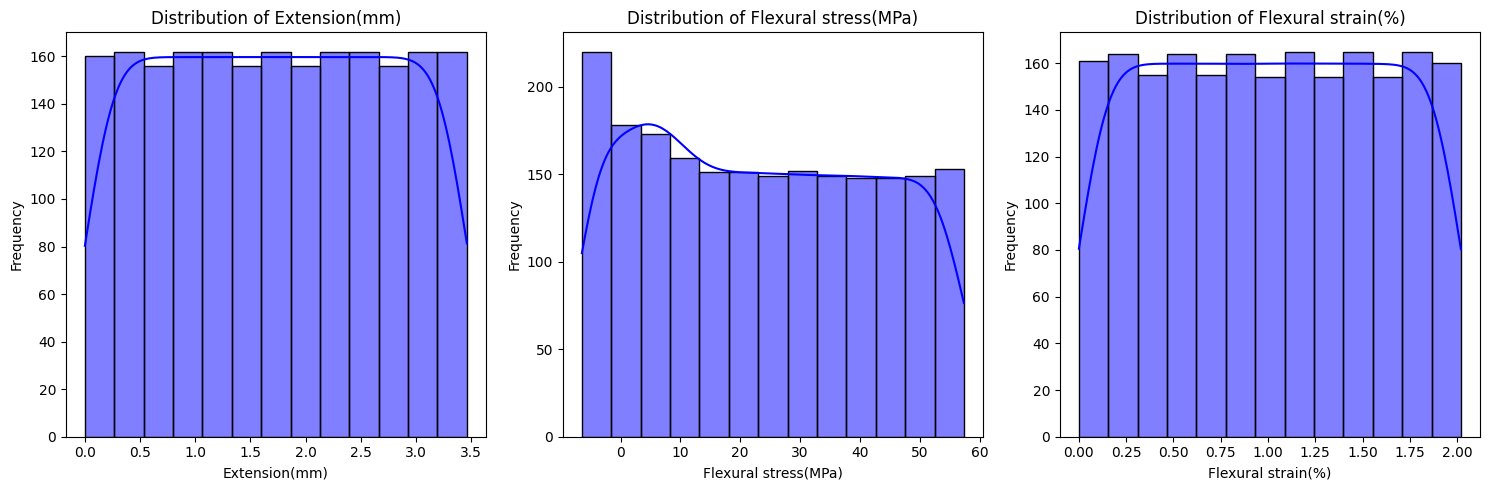

In [37]:
# Plot the distribution of each target variable
plt.figure(figsize=(15, 5))
for i, target in enumerate(y.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[target], kde=True, color='blue')
    plt.title(f"Distribution of {target}")
    plt.xlabel(target)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### **6.2 Relationship between load and target variables**

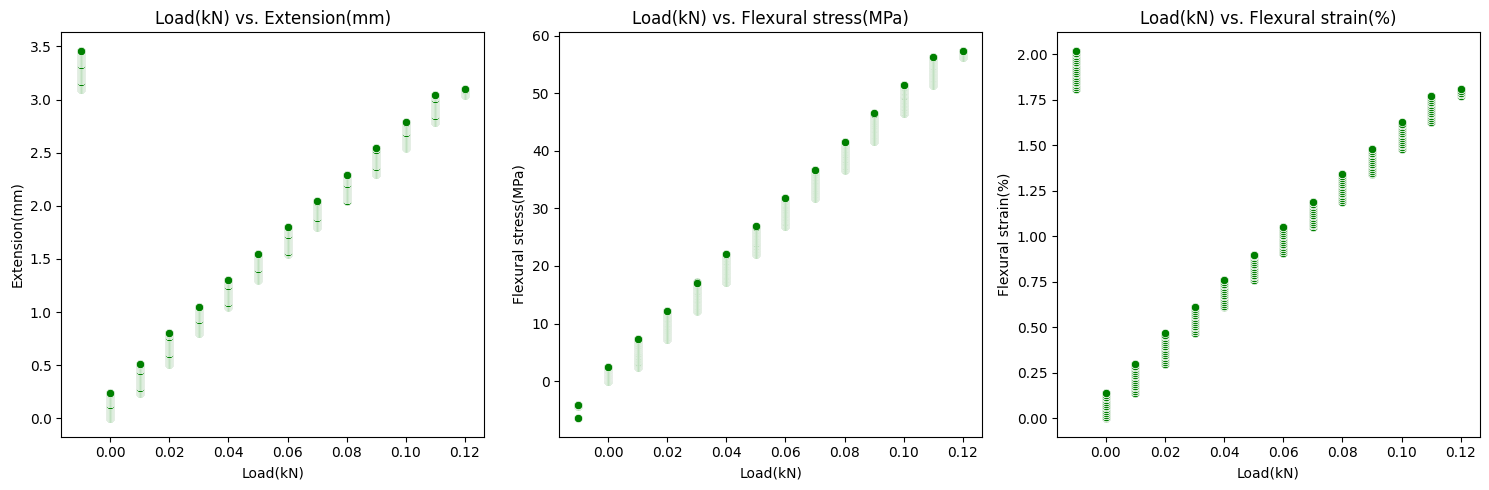

In [38]:
# Scatter plots to visualize the relationship between load and each target
plt.figure(figsize=(15, 5))
for i, target in enumerate(y.columns):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df['Load(kN)'], y=df[target], color='green')
    plt.title(f"Load(kN) vs. {target}")
    plt.xlabel("Load(kN)")
    plt.ylabel(target)
plt.tight_layout()
plt.show()

### **6.3 Actual vs. Predicted values for each target**

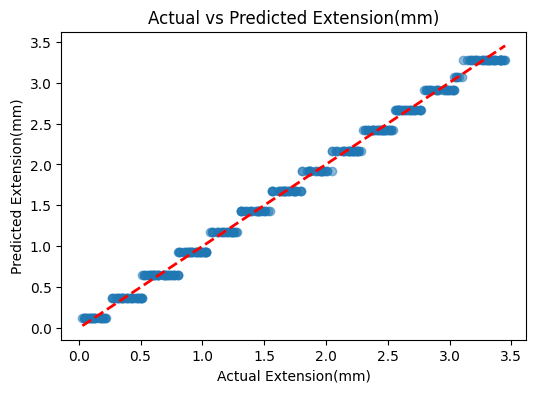

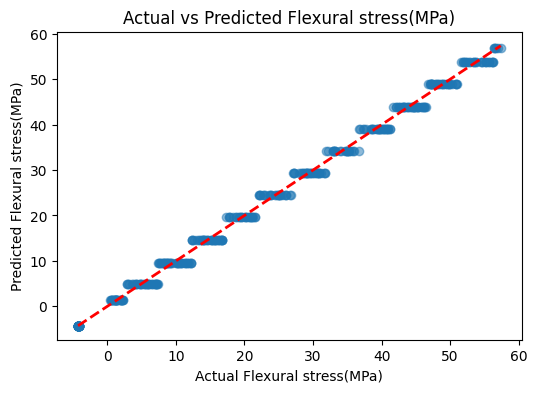

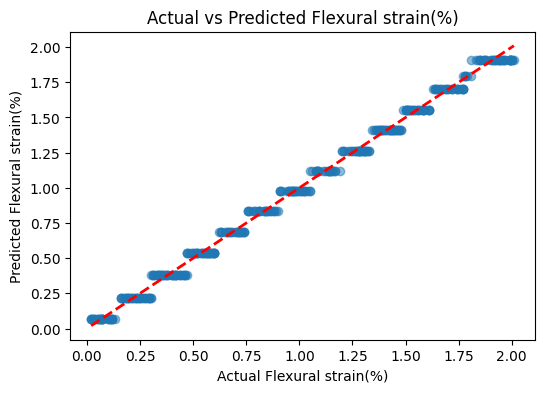

In [39]:
# Plot actual vs predicted for each target variable
targets = y.columns
for i, target in enumerate(targets):
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test[target], y_pred[:, i], alpha=0.5)
    plt.plot([y_test[target].min(), y_test[target].max()],[y_test[target].min(), y_test[target].max()], color='red', linestyle='--', linewidth=2)
    plt.xlabel(f"Actual {target}")
    plt.ylabel(f"Predicted {target}")
    plt.title(f"Actual vs Predicted {target}")
    plt.show()



*   The **predicted** values closely follow the **actual** values along the red dashed line (ideal prediction), indicating that the model **performs well** in predicting extension, flexural stress, and flexural strain.
*   **Minimal Deviation**: The data points exhibit minimal scatter around the red line, suggesting a **low error margin** and **high correlation** between actual and predicted values.
*    Across all three graphs, the trend remains **linear**, indicating that the model generalizes well for different mechanical properties **without** significant bias or overfitting.



### **6.4 Residual plots for each target**

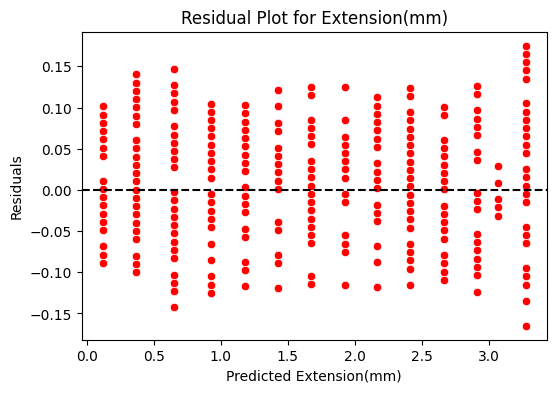

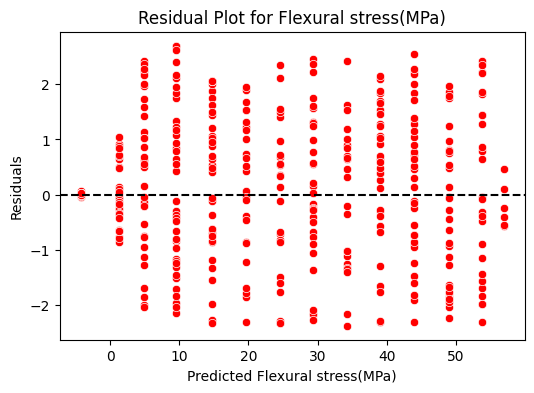

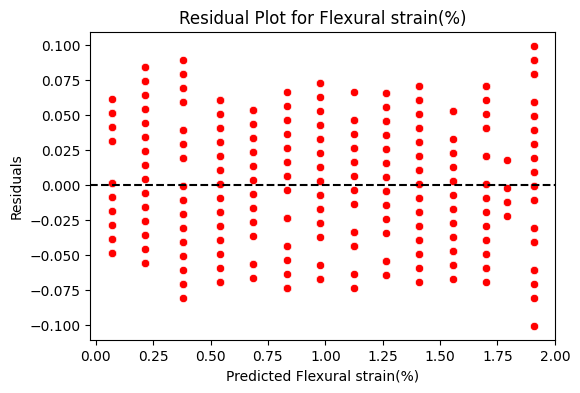

In [40]:
# Plot residuals for each target variable
residuals = y_test - y_pred
for i, target in enumerate(y.columns):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_pred[:, i], y=residuals.iloc[:, i], color='red')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.title(f"Residual Plot for {target}")
    plt.xlabel(f"Predicted {target}")
    plt.ylabel("Residuals")
    plt.show()

In [43]:
# Save the Model
joblib.dump(best_model,'multitarget_random_forest_model.joblib')
# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [44]:
# Load the model and scaler
model = joblib.load('multitarget_random_forest_model.joblib')
scaler = joblib.load('scaler.joblib')

### **7. Deployment**

In [45]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [46]:
!wget -qO- ipv4.icanhazip.com

34.67.219.109


In [48]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴⠦⠧
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.67.219.109:8501

your url is: https://clean-knives-stay.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
  Stopping...
^C
